In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class write():    
    def printExamples(self):
        grouped = self.df.groupby(['organization name', 'website'])
        for (org_name, website), group_data in grouped:
            print("***************************")
            print(f"Organization: {org_name}, Website: {website}")
            for col in ['generated_description', 'Tasks/Jobs', 'Industry', 'Customers', 'generated_description_conf_interval', 'parsed_description_conf_interval']:
                print(f"{col}: {group_data.iloc[0][col]}")
            for example, example_data in group_data.groupby('example'):
                print("_________________________")
                print(f"Example: {example}")
                for col in ['situation_conf_interval', 'situation_conf_interval_reasoning']:
                    print(f"{col}: {example_data.iloc[0][col]}")
                for idx, row in example_data.iterrows():
                    print("##########################")
                    for col in ['job', 'onet_title', 'onet_task', 'example_job_title', 'task_similarity', 'job_title_similarity', 'onet_weight']:
                        print(f"{col}: {row[col]}")
            print("***************************\n")
        
        def writeExamples(self):
            output_file_path = "../output/examples.txt"
            with open(output_file_path, 'w') as f:
                grouped = self.df.groupby(['organization name', 'website'])
                for (org_name, website), group_data in grouped:
                    f.write("***************************\n")
                    f.write(f"Organization: {org_name}, Website: {website}\n")
                    for col in ['generated_description', 'Tasks/Jobs', 'Industry', 'Customers', 'generated_description_conf_interval', 'parsed_description_conf_interval']:
                        f.write(f"{col}: {group_data.iloc[0][col]}\n")
                    for example, example_data in group_data.groupby('example'):
                        f.write("_________________________\n")
                        f.write(f"Example: {example}\n")
                        for col in ['situation_conf_interval', 'situation_conf_interval_reasoning']:
                            f.write(f"{col}: {example_data.iloc[0][col]}\n")
                        for idx, row in example_data.iterrows():
                            f.write("##########################\n")
                            for col in ['job', 'onet_title', 'onet_task', 'example_job_title', 'task_similarity', 'job_title_similarity','onet_weight']:
                                f.write(f"{col}: {row[col]}\n")
                    f.write("***************************\n\n")
                        
        def generateOutput(self):
            self.conf_interval_text = self.conf_interval if self.conf_interval != True else 'all'
            output_file_path = f"../output/output_{self.task_sim}_{self.title_sim}_{self.conf_interval_text}.txt"
            
            with open(output_file_path, 'w') as f:
                
                group_sums = self.df.groupby('Minor Group Name')['onet_weight'].sum().sort_values(ascending=False)
                f.write(f"{self.num_onet_startups} Startups Founded post launch of chatGPT with 1-10 employees\n")
                
                f.write(f"Task Similarity: {self.task_sim}, Title Similarity {self.title_sim}, Confidence Interval: {self.conf_interval_text}\n")
                f.write(f"{self.num_onet_startups} startups out of {self.num_startups} decomposed\n")
                f.write("Decomposition of startup effect on labor market\n")
                
                for group_name in group_sums.index:
                    group_data = self.df[self.df['Minor Group Name'] == group_name]
                    f.write("*****************\n")
                    f.write(f"Group: {group_name}\n")
                    onet_titles = group_data.groupby('onet_title')['onet_weight'].sum().round(2).sort_values(ascending=False).reset_index()
                    onet_tasks = group_data.groupby('onet_task')['onet_weight'].sum().round(2).sort_values(ascending=False).reset_index()
                    
                    f.write("________________\n")
                    f.write("10 Most Highly Weighted Titles:\n")
                    for index, row in onet_titles.iterrows():
                        f.write(f"Title: {row['onet_title']}, Weight: {row['onet_weight']}\n")
                    f.write("\n")
                
                    f.write("10 Most Highly Weighted Tasks:\n")
                    for index, row in list(onet_tasks.iterrows())[:10]:
                        f.write(f"Task: {row['onet_task']}, Weight: {row['onet_weight']}\n")
                    f.write("\n")
                
                    f.write("10 Example Startups:\n")
                    startups = group_data.groupby(['organization_name','website'])['onet_weight'].sum().round(2).sort_values(ascending=False).reset_index()
                    for index, row in list(startups.iterrows())[:10]:
                        f.write(f"Startup: {row['organization_name']}, Website: {row['website']}\n")
                    f.write("\n")
        
# def check_onet_title_match(df):
#     codes = pd.read_csv("../input/soc_codes/all_soc_codes.csv",index_col=0)
#     df['similar_title_groups'] = df.example_job_title.apply(
#         lambda x: [title for y in x.split(" and ") for title in codes[codes["Title"].str.contains(re.escape(y), na=False)]["Title"].values]
#     )
#     df['title_overlap'] = df.apply(lambda x: x["Broad Group"] in x.similar_title_groups, axis=1)
#     df_empty = df[~df.title_overlap]
#     print(len(df_empty))
#     df = df[df.title_overlap]
#     df_empty.loc[:, "title_groups"] = df_empty.Job_similarity_titles.apply( lambda x: [y[1] for y in json.loads(x)] if not pd.isnull(x) else np.nan )
#     df_empty.loc[:, "similar_title_groups"] = df_empty.Job_similarity_titles.apply( lambda x: [y[1][1][:6] + "0" for y in json.loads(x)] if not pd.isnull(x) else np.nan )
#     df = pd.concat([df,df_empty],axis=0)
#     df['title_overlap'] = df.apply(lambda x: x["Broad Group"] in x.similar_title_groups, axis=1)
#     print(f"The number of titles that did not overlap {len(df[~df.title_overlap])}")
#     df = df[df.title_overlap]
#     return df

In [53]:
class output():
    def __init__(self):
        self.codes = pd.read_csv("../input/soc_codes/soc_codes.csv",index_col=0)

    
    def getONET(self,task_sim, title_sim, conf_interval=True):
        self.task_sim = task_sim
        self.title_sim = title_sim
        self.conf_interval = conf_interval
        self.onet_df = pd.read_csv("../output/results v3/onet_df.csv")
        self.onet_df = self.onet_df[(self.onet_df.task_similarity > task_sim) & (self.onet_df.job_title_similarity > title_sim)].reset_index(drop=True)

        self.onet_df = self.onet_df[self.onet_df.situation_conf_interval > conf_interval]
        self.computeONETWeights()
        self.getStartupData()
        self.num_startups = len(self.startup_df["organization name"].unique())
        self.num_onet_startups = len(self.onet_df["organization_name"].unique())
        print(f"{len(self.onet_df)} tasks with task similarity > {task_sim} and title similarity > {title_sim}")
 
        print(f"{self.num_onet_startups} startups out of {self.num_startups} decomposed")
        
    def computeONETWeights(self):
        self.onet_weights = self.onet_df.groupby("organization_name")["onet_title"].count().apply(lambda x: 1/x).reset_index().rename({"onet_title":"onet_weight"},axis=1)
        self.onet_df = self.onet_df.merge(self.onet_weights, on="organization_name")

    def getONETTitles(self):
        self.onet_titles = self.df.groupby("onet_title").aggregate({"onet_weight":"sum","Detailed Occupation":"first"})
        self.onet_titles.onet_weight = self.onet_titles.onet_weight.round(2)
        self.onet_titles = self.onet_titles.reset_index().sort_values(by="onet_weight", ascending=False) 
        return self.onet_titles

    def getStartupGeneratedLLMTitles(self):
        self.example_job_titles_df = onet_df.example_job_title.value_counts().apply(lambda x: x/3).reset_index()
        return self.example_job_titles_df

    def printTop100ONETTasks(self):
        self.top_100_ONETtasks = onet_df['onet_task'].value_counts().reset_index().head(100)
        self.top_100_tasks.columns = ['Task', 'Frequency']
        for index, row in self.top_100_tasks.iterrows():
            print(f"Task = {row['Task']}, Frequency = {row['Frequency']}\n")
    
    def getStartupData(self):
        self.startup_df = pd.read_csv("../output/results v3/df_with_examples.csv")
        cols = ['organization name', 'founded date','website','description_all', 'industries_parsed', 'generated_description', 'parsed_description', 'Tasks/Jobs', 'Industry', 'Customers','generated_description_conf_interval','parsed_description_conf_interval']
        self.df = self.startup_df[cols]
        self.df = self.df.merge(self.onet_df,left_on="organization name",right_on="organization_name")
        self.df = self.df.merge(self.codes,left_on="onet_title",right_on="Title")

    def getWage(self):
        self.wage_employment = pd.read_csv("../input/wage_employment/wage_employment_bls.csv")
        self.wage_employment = self.wage_employment[self.wage_employment.O_GROUP == "detailed"]
        self.wage_employment = self.wage_employment.rename({"OCC_CODE":"Detailed Occupation"},axis=1)
        self.wage_employment = self.wage_employment.replace("#",np.nan).replace("*",np.nan).replace({",":""}, regex=True)
        self.wage_employment[["H_MEDIAN","A_MEDIAN"]] = self.wage_employment[["H_MEDIAN","A_MEDIAN"]].astype("float")
        self.wage_employment["H_MEDIAN"] = self.wage_employment["H_MEDIAN"].round(0)
        
    def getSkills(self):
        self.skills_df = pd.read_csv("../input/skills/Skills.csv")
        self.skills_df = self.skills_df[self.skills_df["Scale Name"]=="Importance"]
        self.skills_df = self.skills_df.rename(columns={"O*NET-SOC Code":"Detailed Occupation"})
        self.skills_df["Detailed Occupation"] = self.skills_df["Detailed Occupation"].replace(r'\.\d{2}', '', regex=True)
        self.skills_df = self.skills_df.pivot_table(index=self.skills_df["Detailed Occupation"], columns='Element Name', values='Data Value', fill_value=0)
    
    def getSkillsSOC(self):
        self.skills_df = pd.read_csv("../input/skills_df_soc_codes.csv",index_col=0)
        
    def getWageSkills(self):
        self.getWage()
        self.getSkillsSOC()
        self.bls_df = self.skills_df.merge(self.wage_employment, on="Detailed Occupation", how="inner")
        
        
    def BLS(self):
        self.titles_df = self.getONETTitles()
        self.bls_df = self.titles_df.merge(self.bls_df, on="Detailed Occupation", how="right")

        
                

        # plt.figure(figsize=(14, 6))
        # for major_group_name in self.bls_df['Major Group Name'].unique():
        #     subset = self.bls_df[self.bls_df['Major Group Name'] == major_group_name]
        #     plt.scatter(subset['onet_weight'], subset['H_MEDIAN'], label=major_group_name)
        # plt.xlabel('ONET Weight')
        # plt.ylabel('Hourly Median Wage')
        # plt.title('Hourly Median Wage vs. ONET Weight')
        # plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
        # plt.tight_layout()
        # plt.show()
    
        # # Scatter plot for A_MEDIAN (Annual Median Wage)
        # plt.figure(figsize=(14, 6))
        # for major_group_name in self.bls_df['Major Group Name'].unique():
        #     subset = self.bls_df[self.bls_df['Major Group Name'] == major_group_name]
        #     plt.scatter(subset['onet_weight'], subset['A_MEDIAN'], label=major_group_name)
        # plt.xlabel('ONET Weight')
        # plt.ylabel('Annual Median Wage')
        # plt.title('Annual Median Wage vs. ONET Weight')
        # plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
        # plt.tight_layout()
        # plt.show()


out = output()
out.getONET(task_sim=.67,title_sim=.65)
out.getWageSkills()
out.BLS()

In [58]:
out = output()
out.getONET(task_sim=.67,title_sim=.65)
out.getWageSkills()
out.BLS()
# out.printExamples()
# out.generateOutput()
# out.writeExamples()

3098 tasks with task similarity > 0.67 and title similarity > 0.65
1250 startups out of 2188 decomposed


In [28]:
df = pd.read_csv("../output/results v3/onet_df.csv")
df = df[df.task_similarity > .67]
len(df["organization_name"].unique())

1827

In [45]:
len(out.onet_df["organization_name"].unique())

868

In [22]:
startup_df = pd.read_csv("../output/results v3/df_with_examples.csv")
len(startup_df["organization name"].unique())

2188

In [448]:
wage_employment = out.wage_employment
skills_df = pd.read_csv("../input/skills_df_soc_codes.csv")


In [65]:
bls_df = out.bls_df


In [66]:
bls_df = bls_df.replace(np.nan,0)

In [80]:
bls_df = bls_df[(bls_df["onet_weight"]<20) & (bls_df["onet_weight"]>3)]

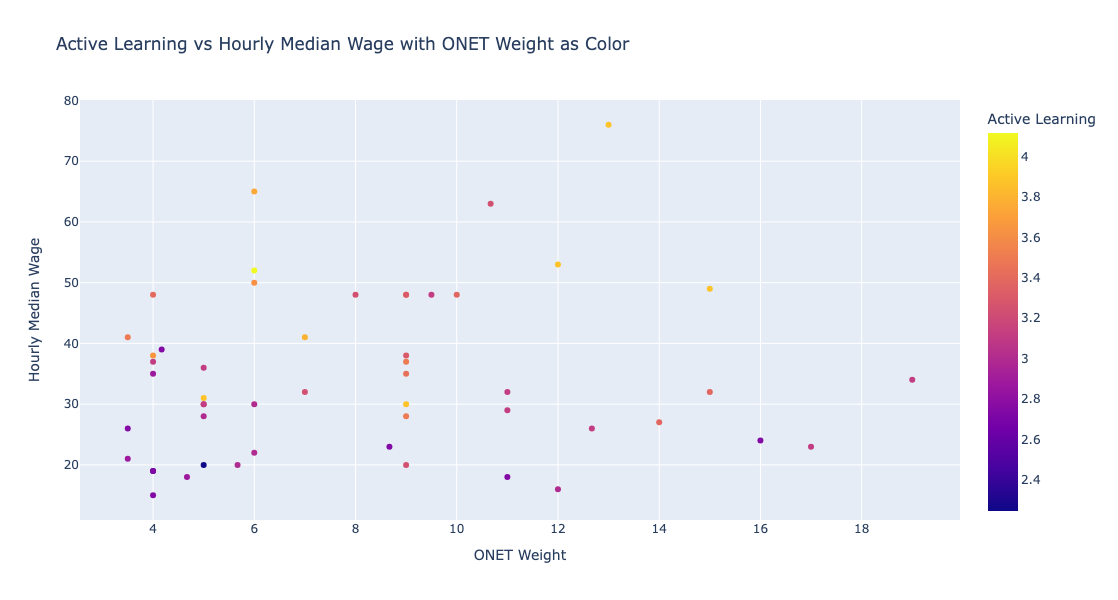

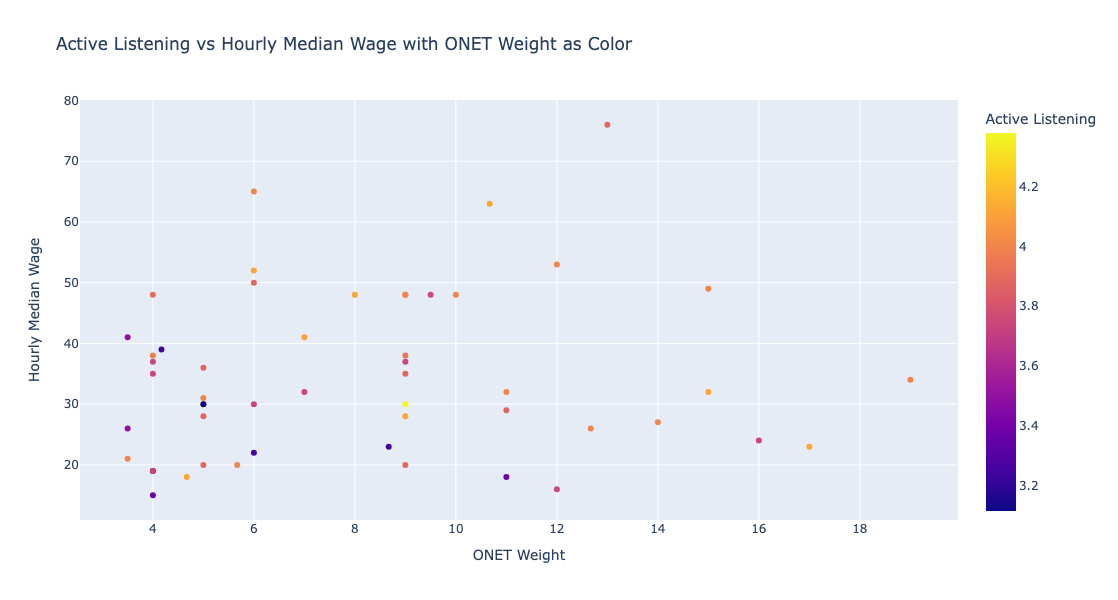

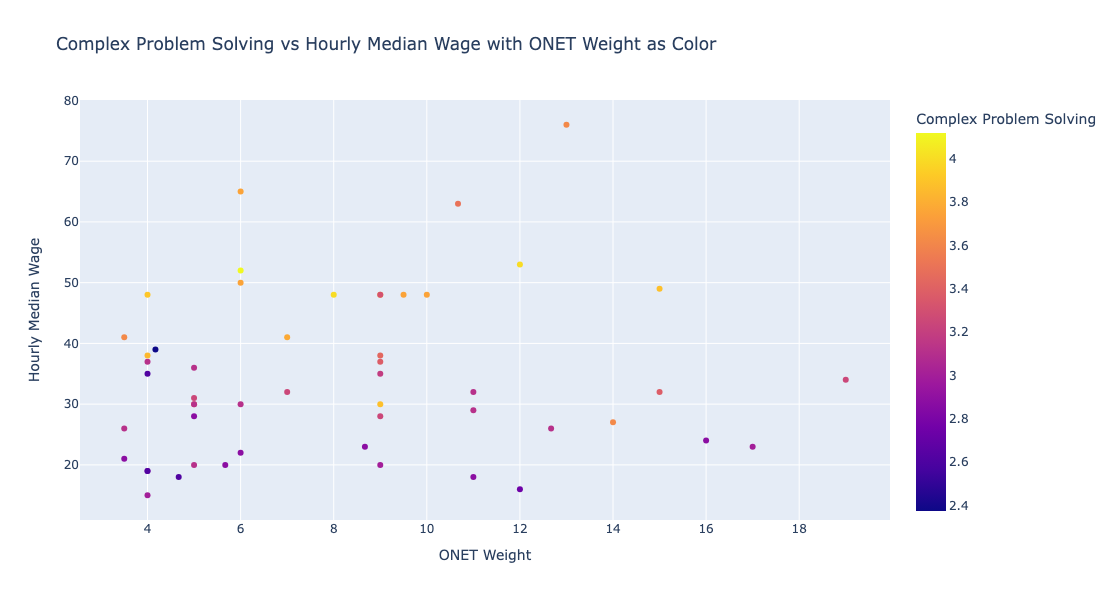

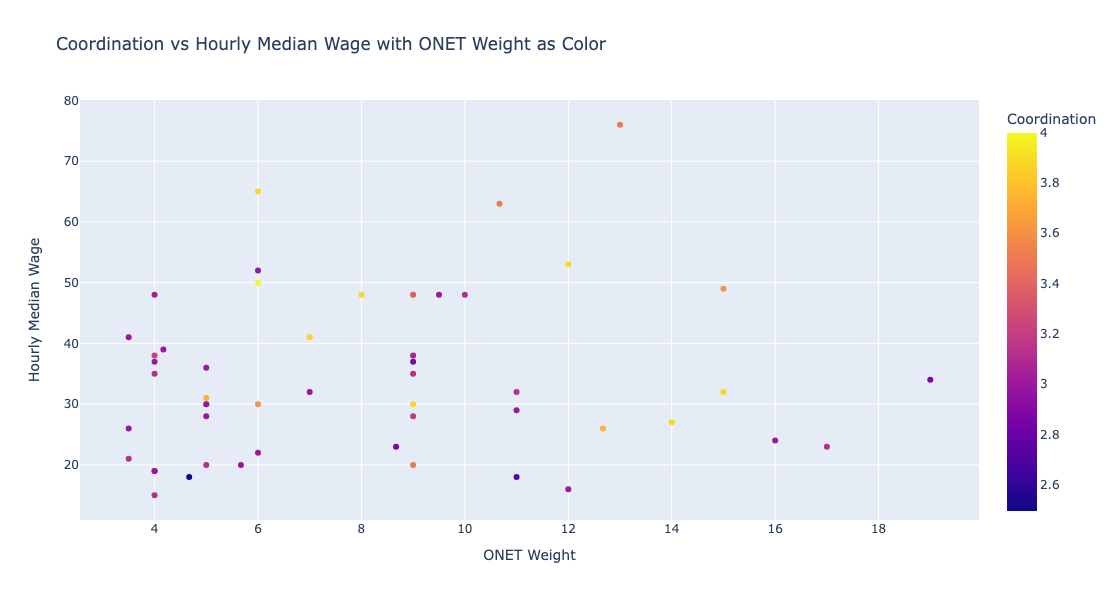

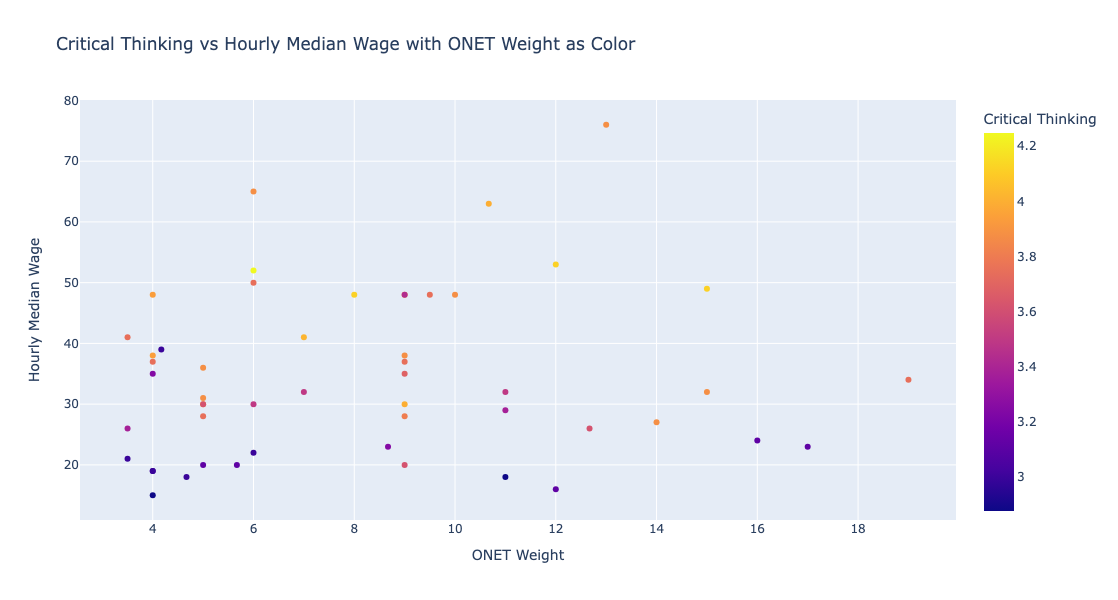

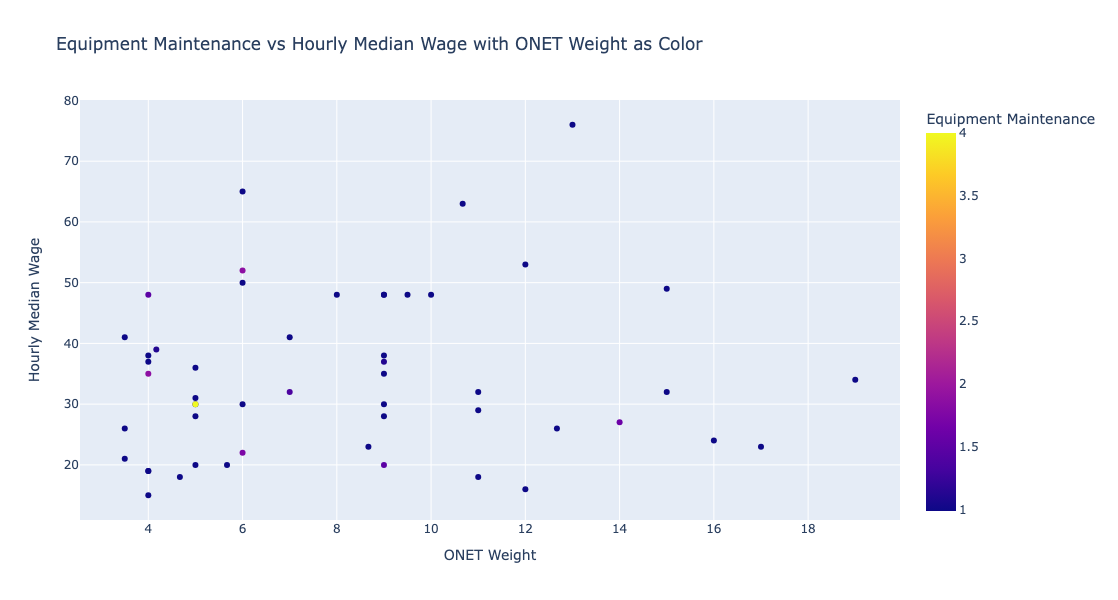

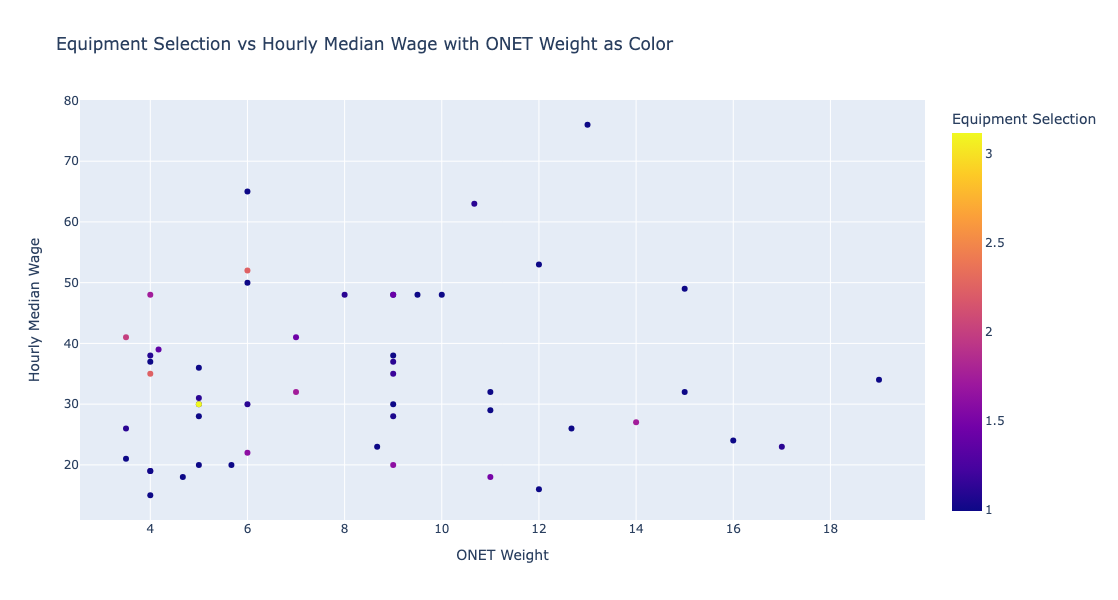

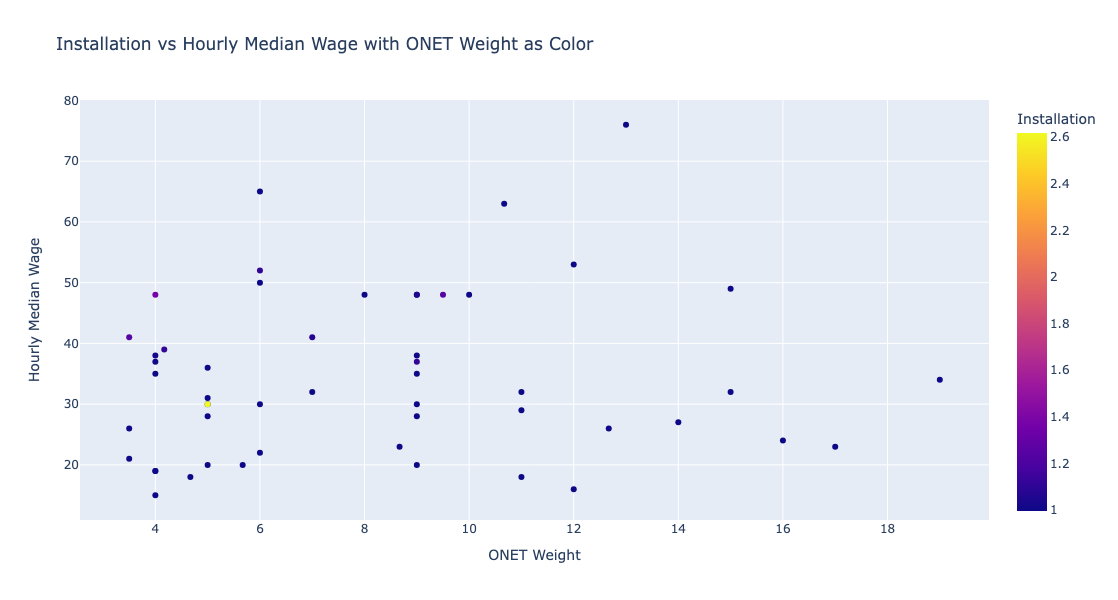

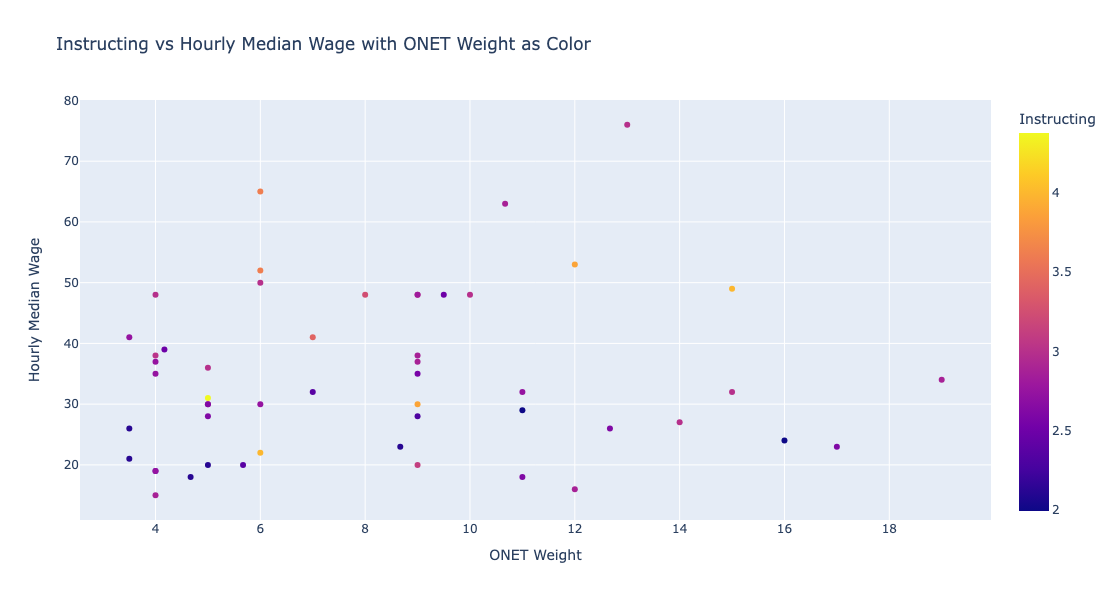

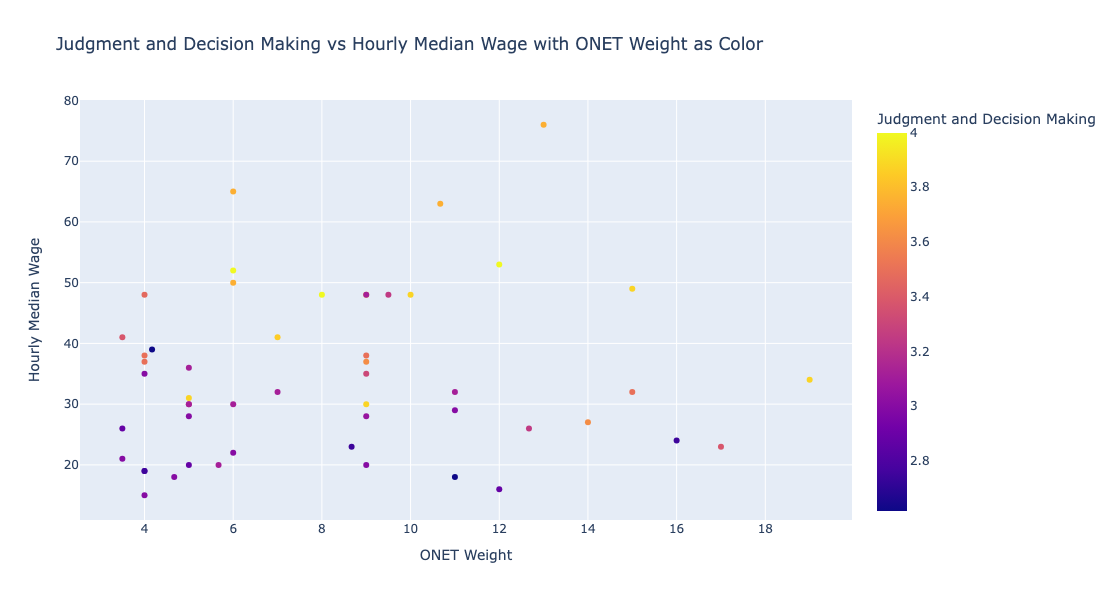

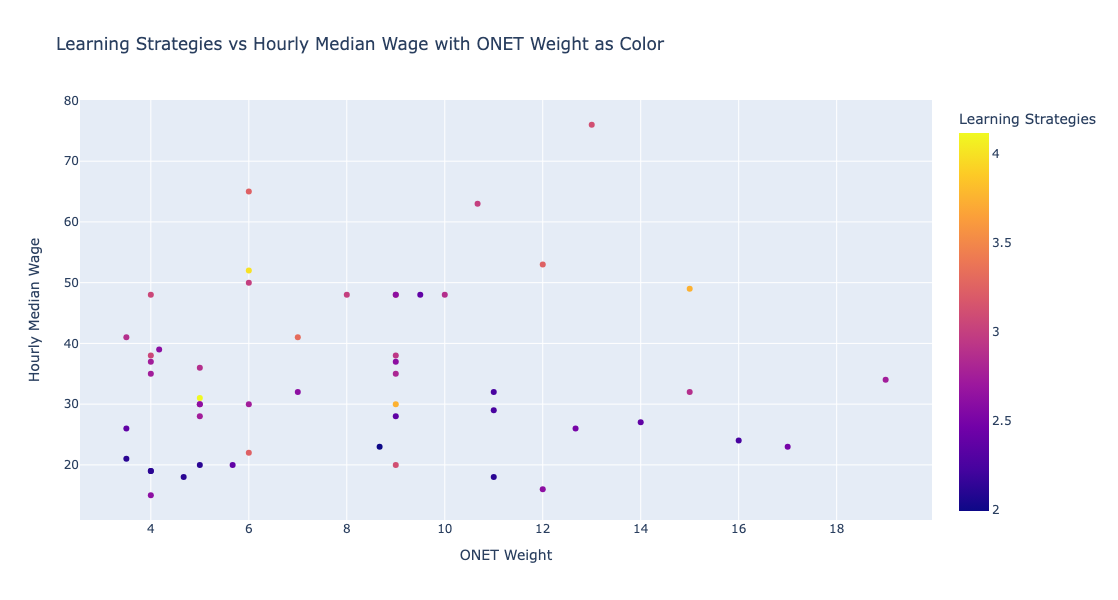

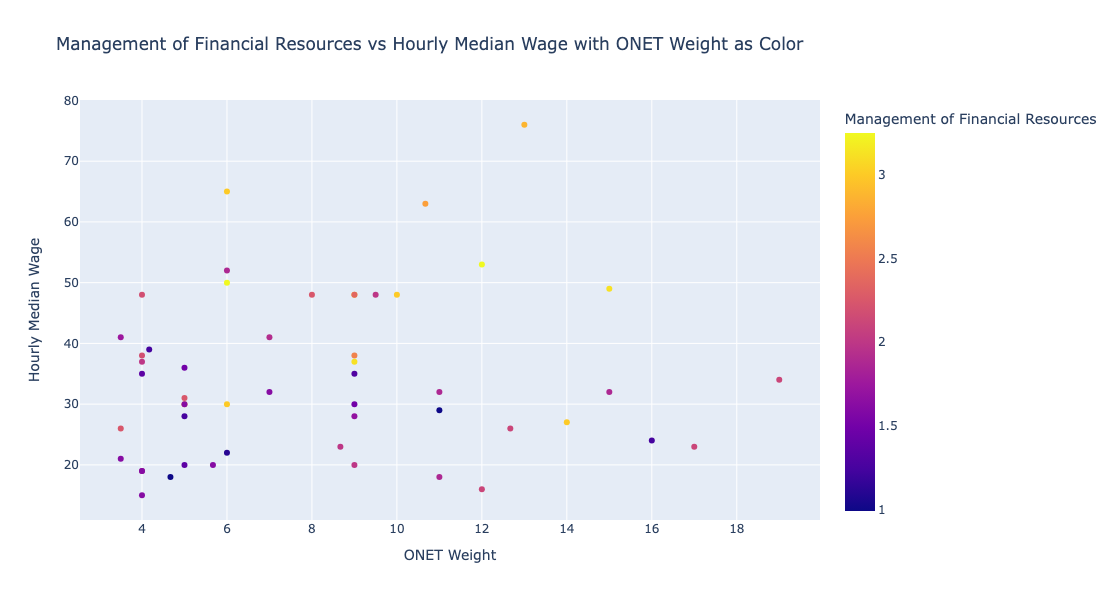

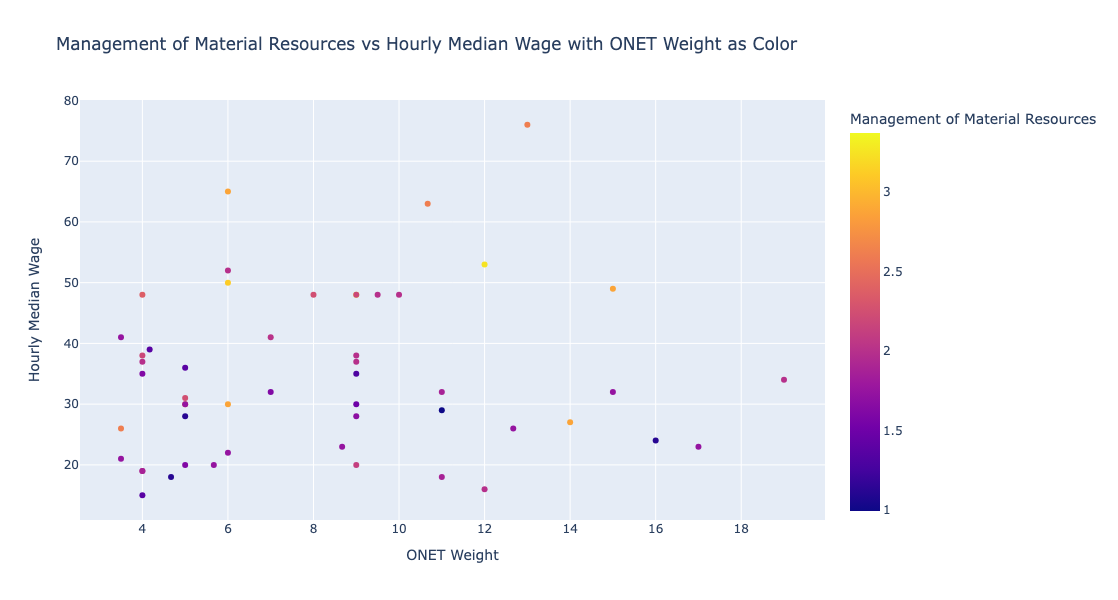

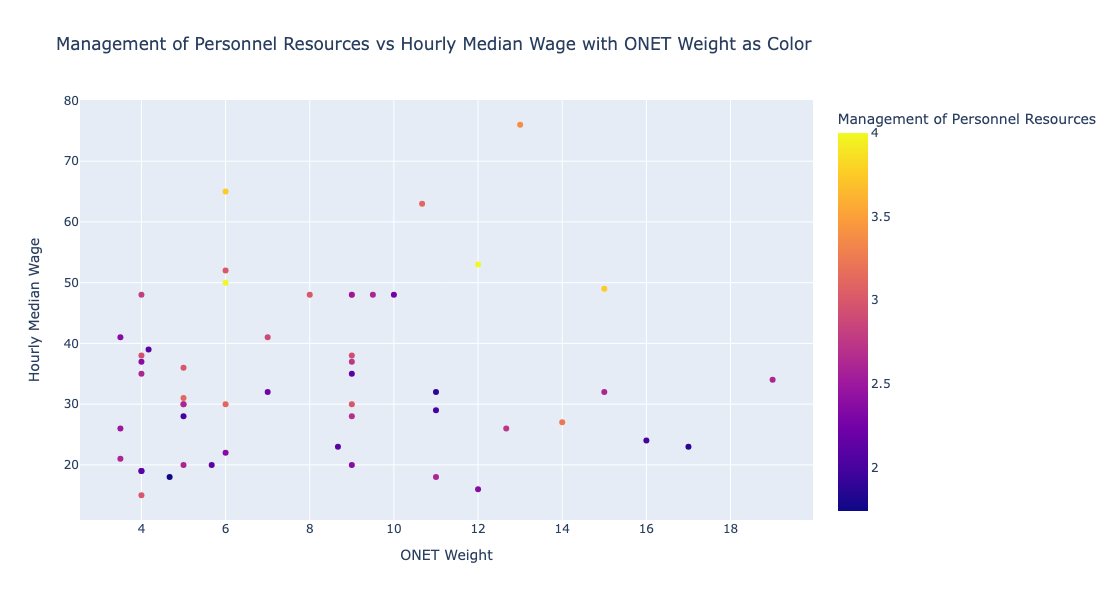

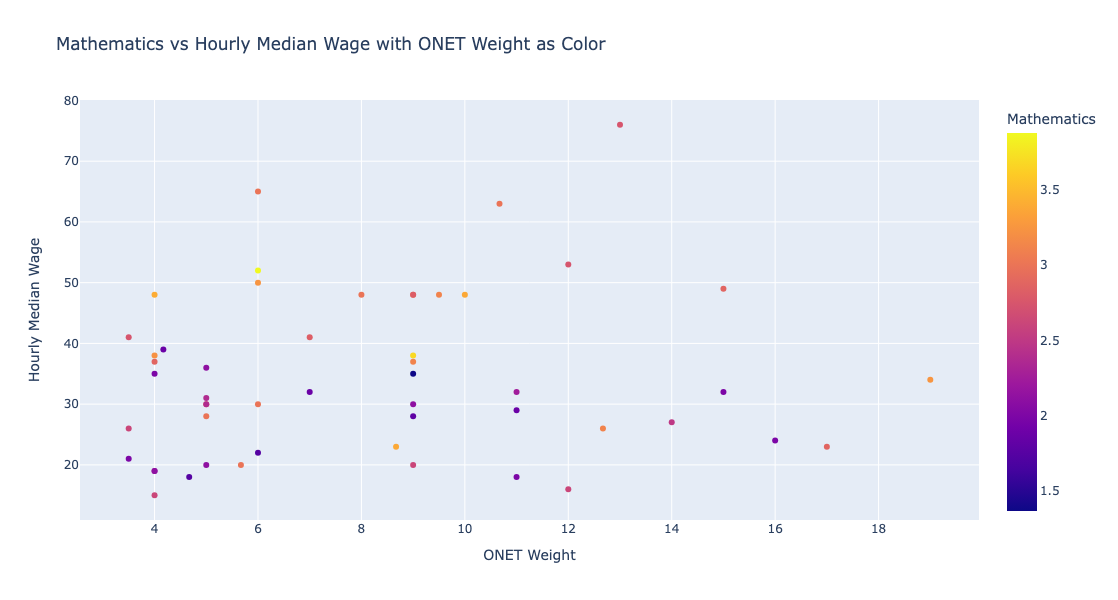

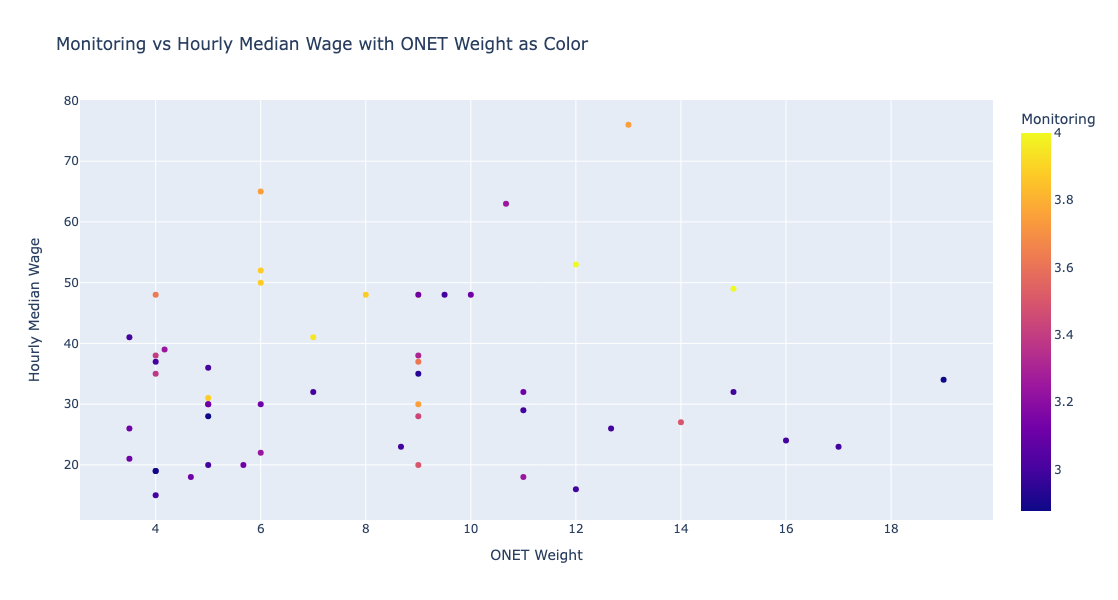

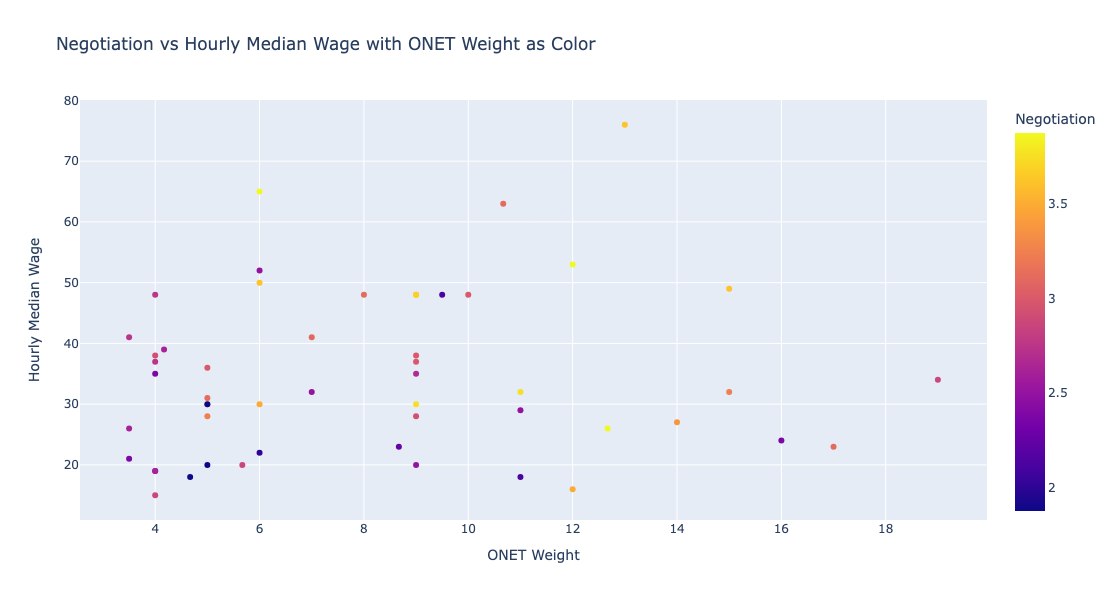

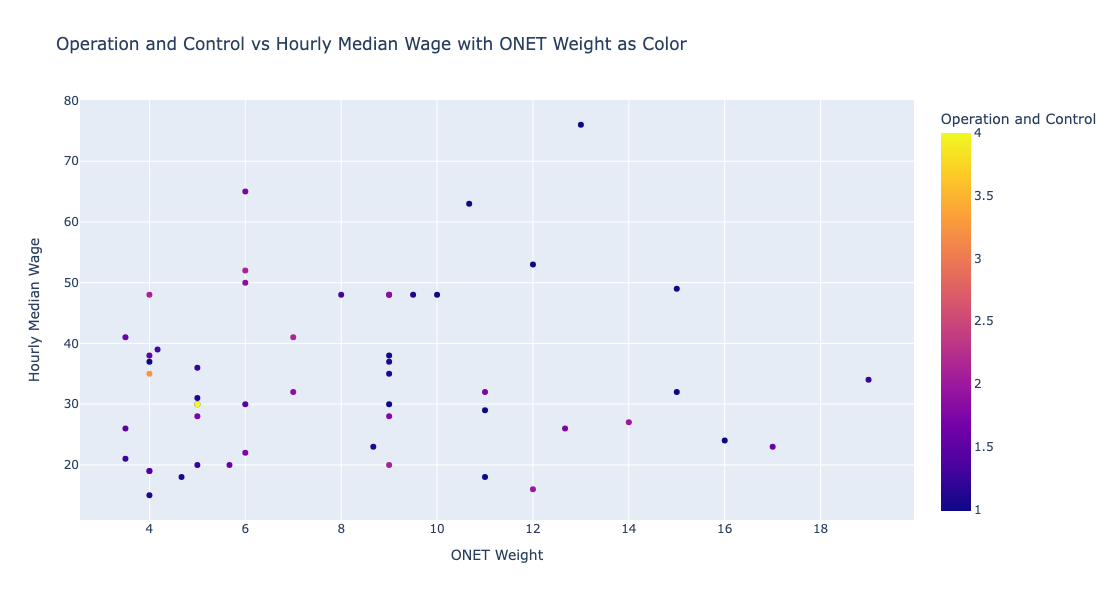

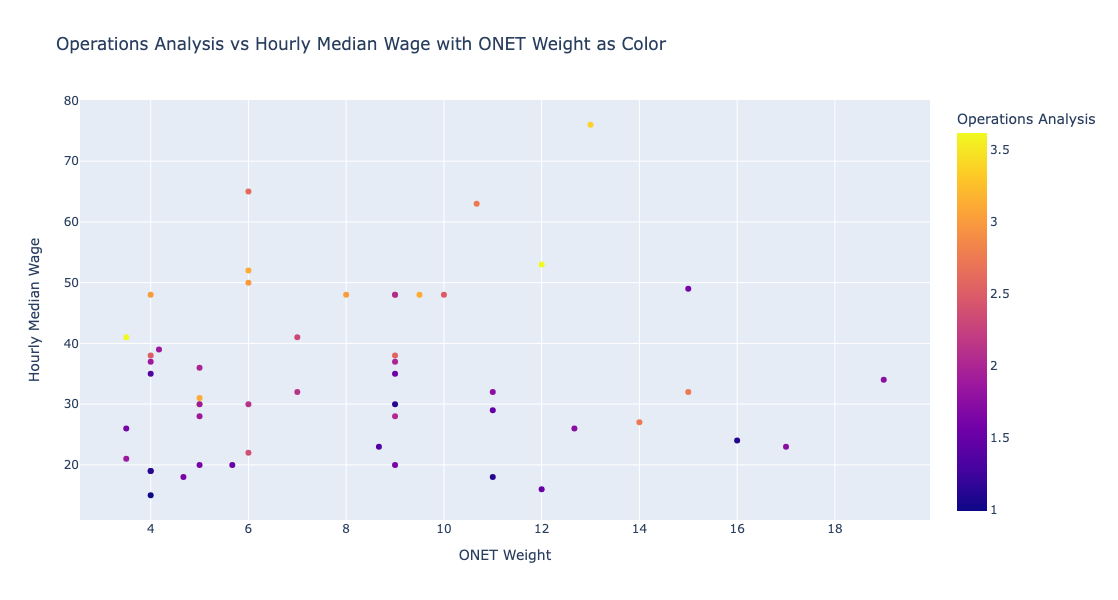

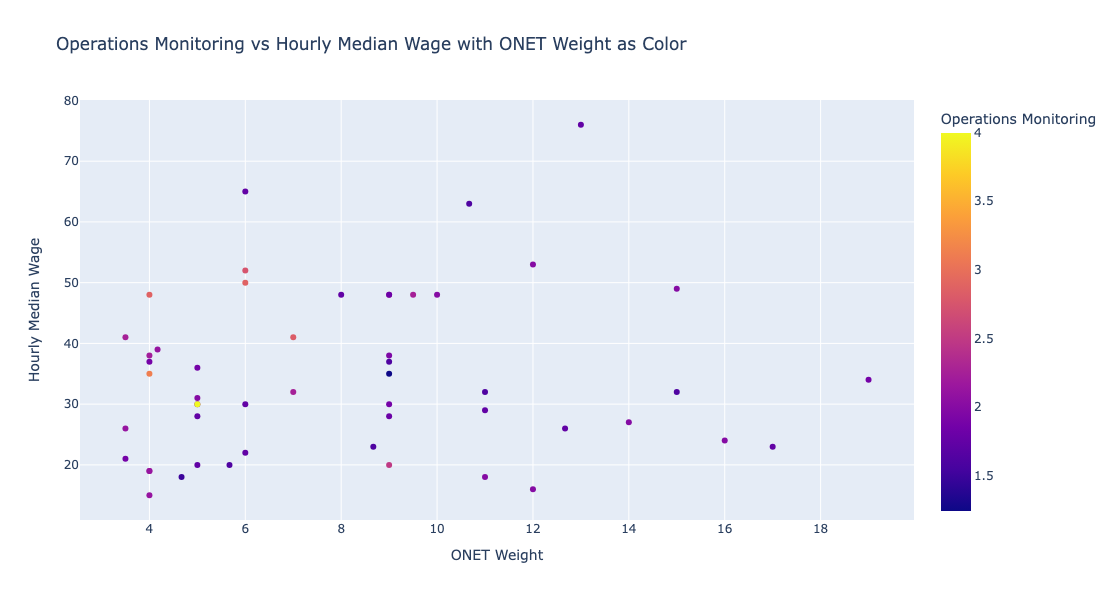

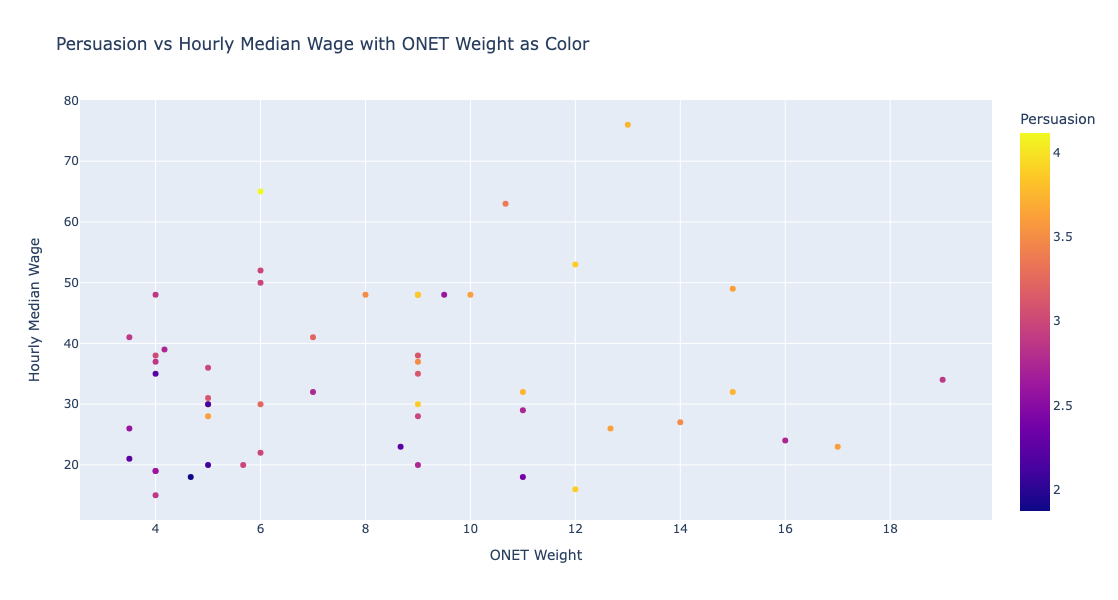

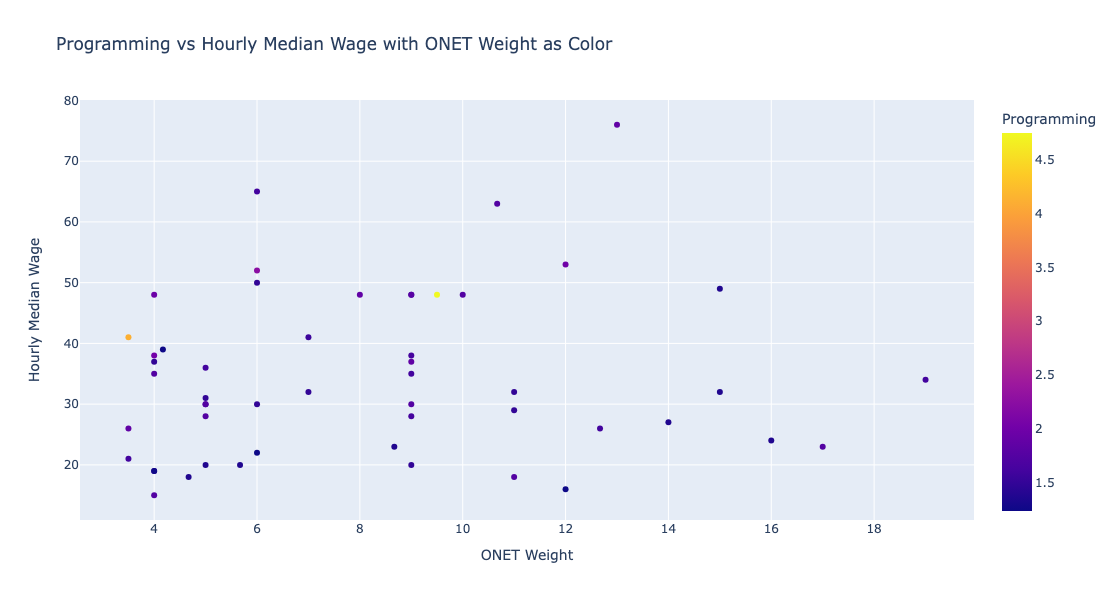

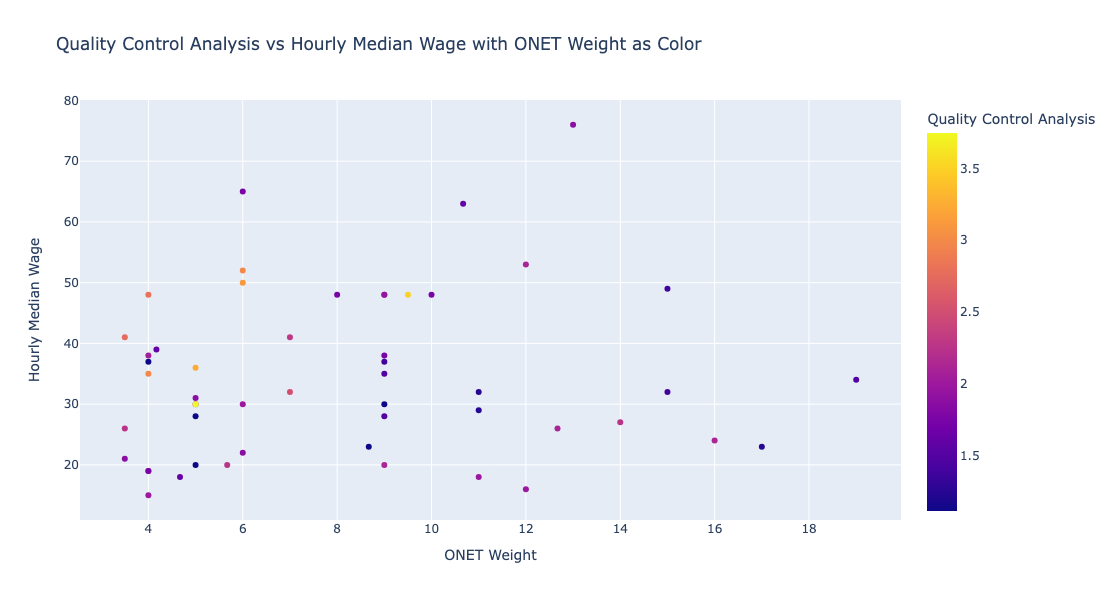

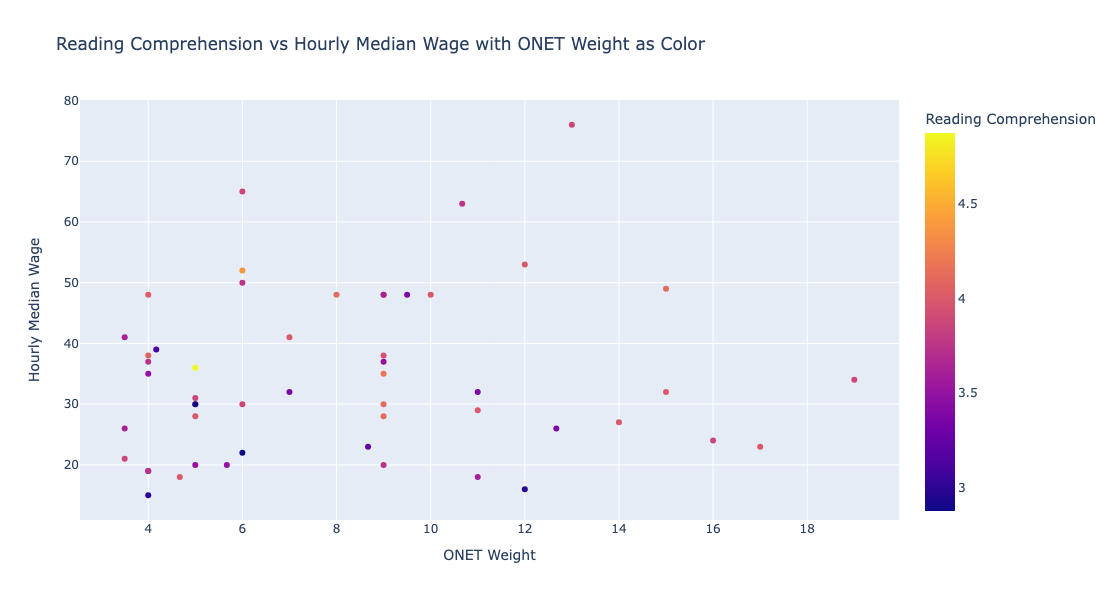

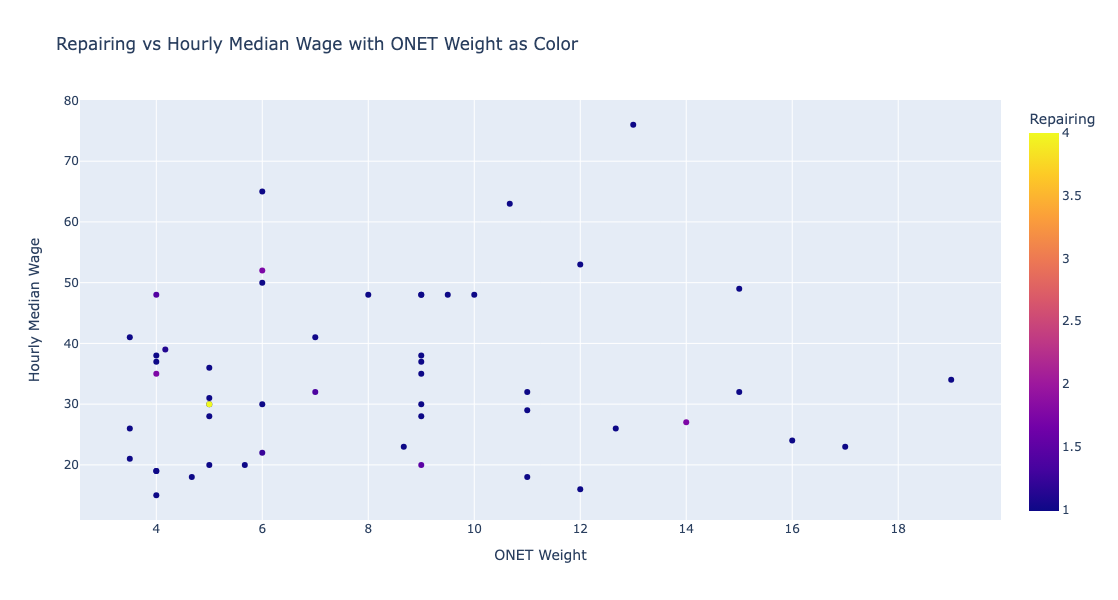

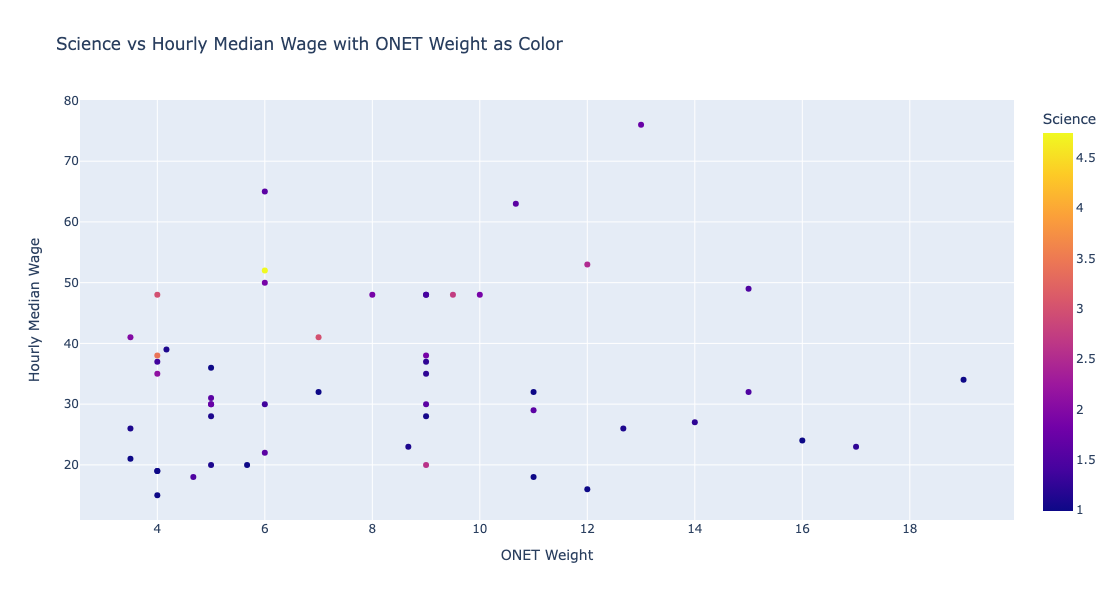

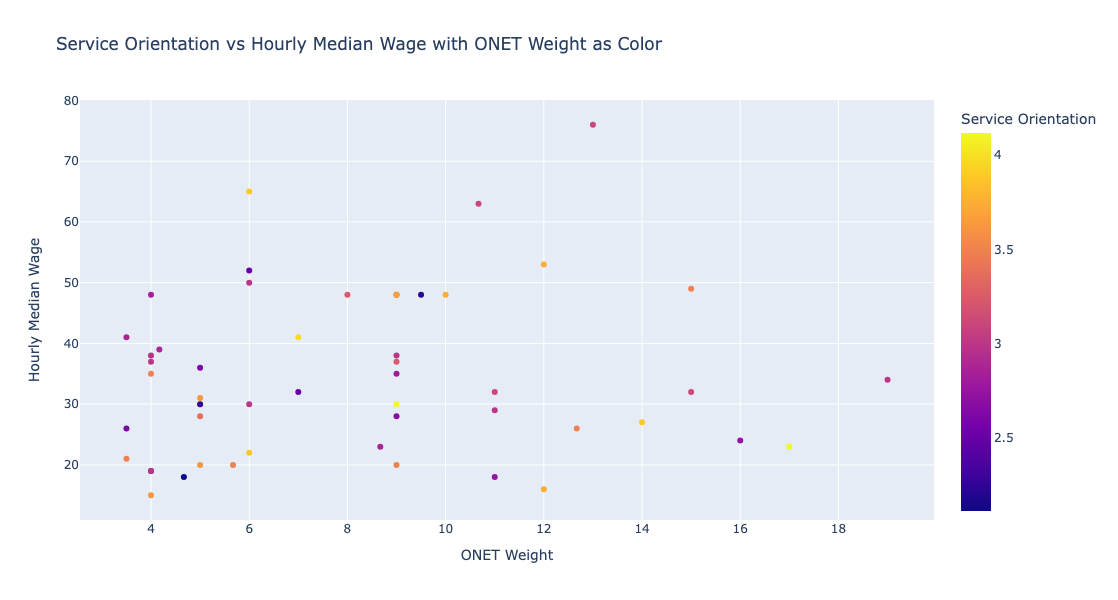

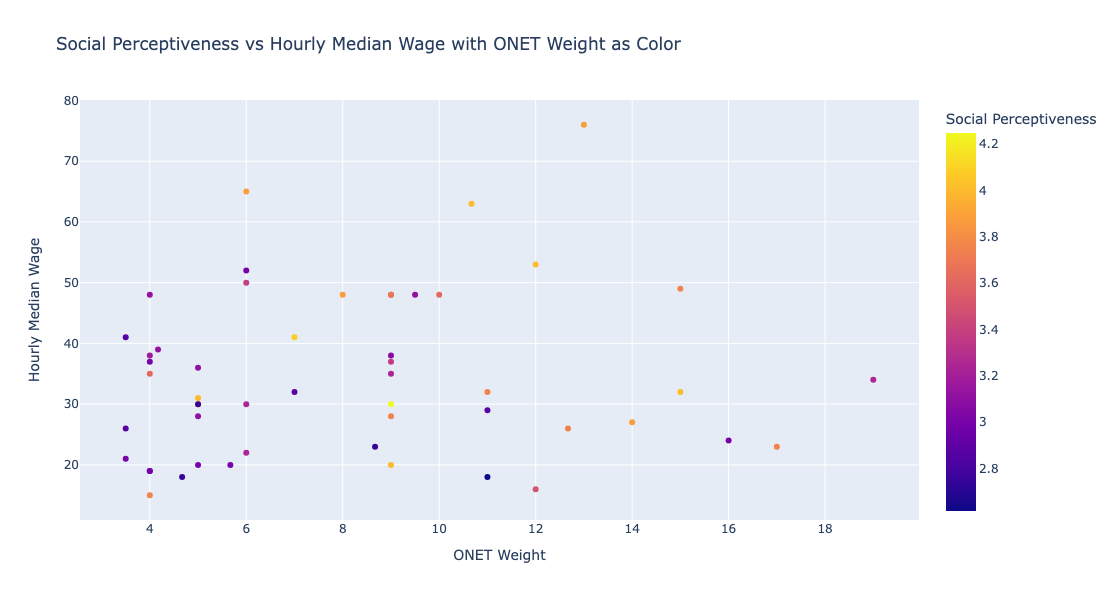

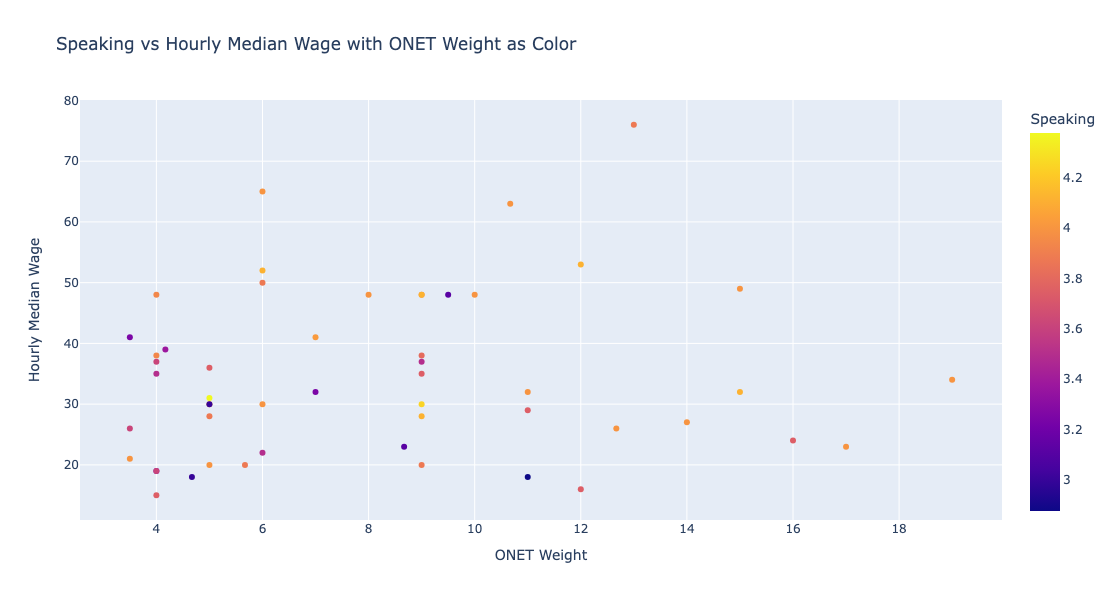

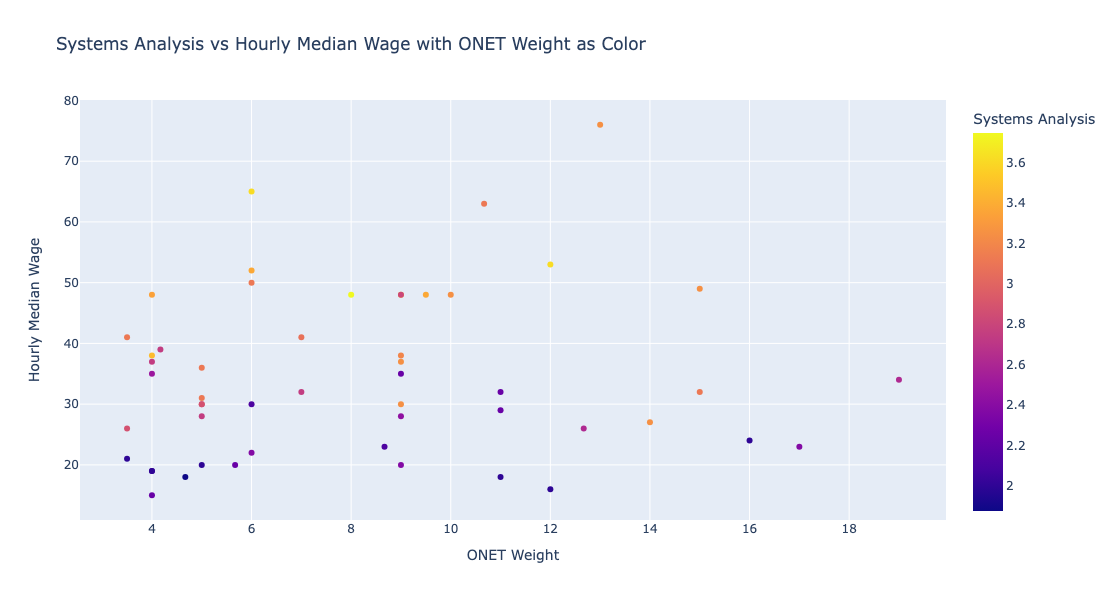

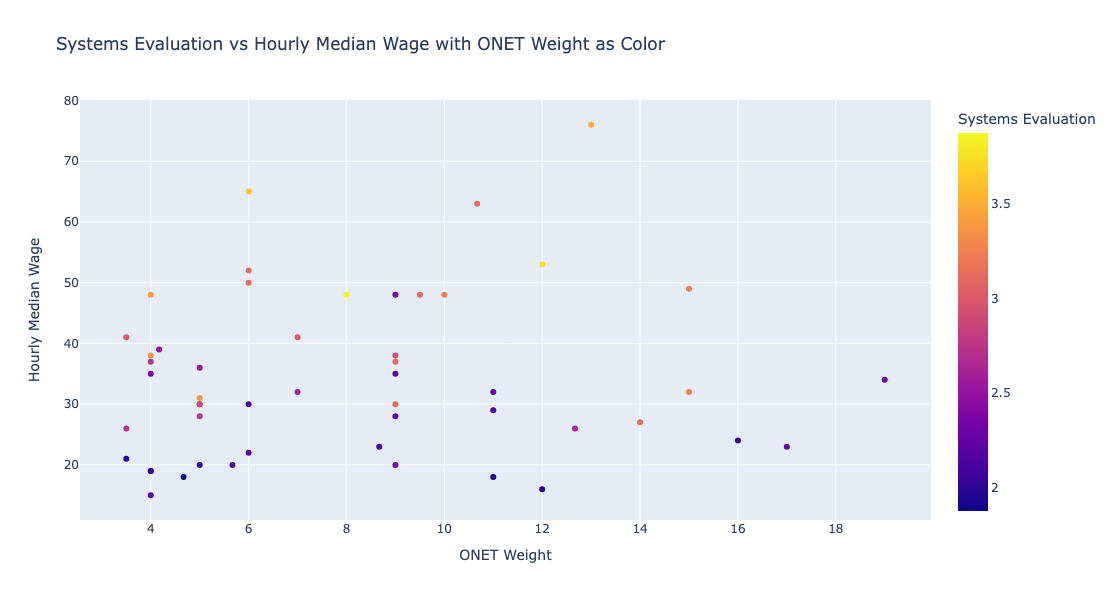

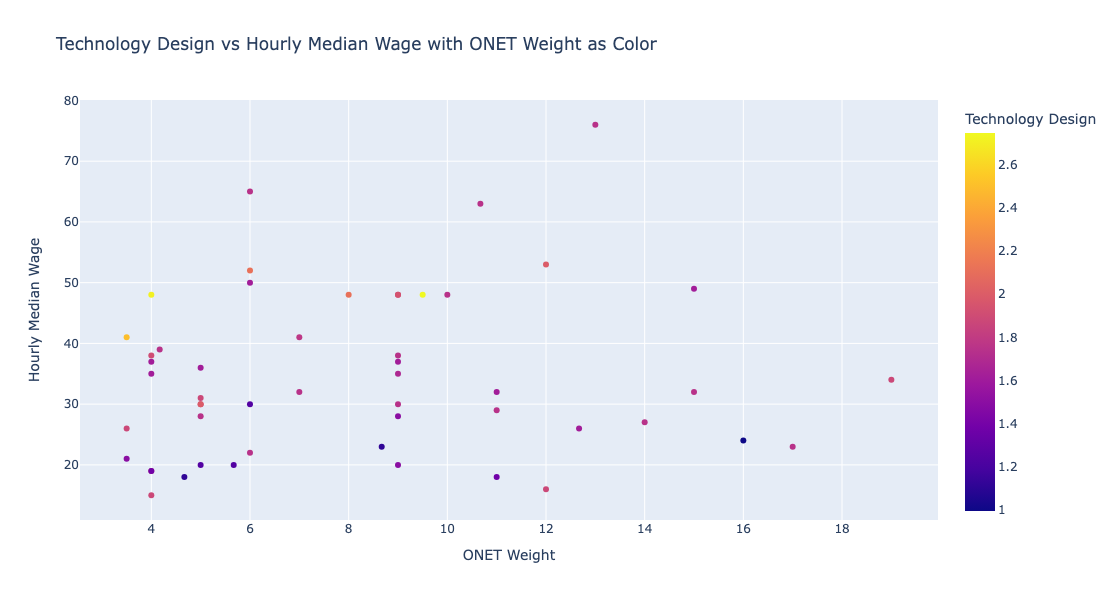

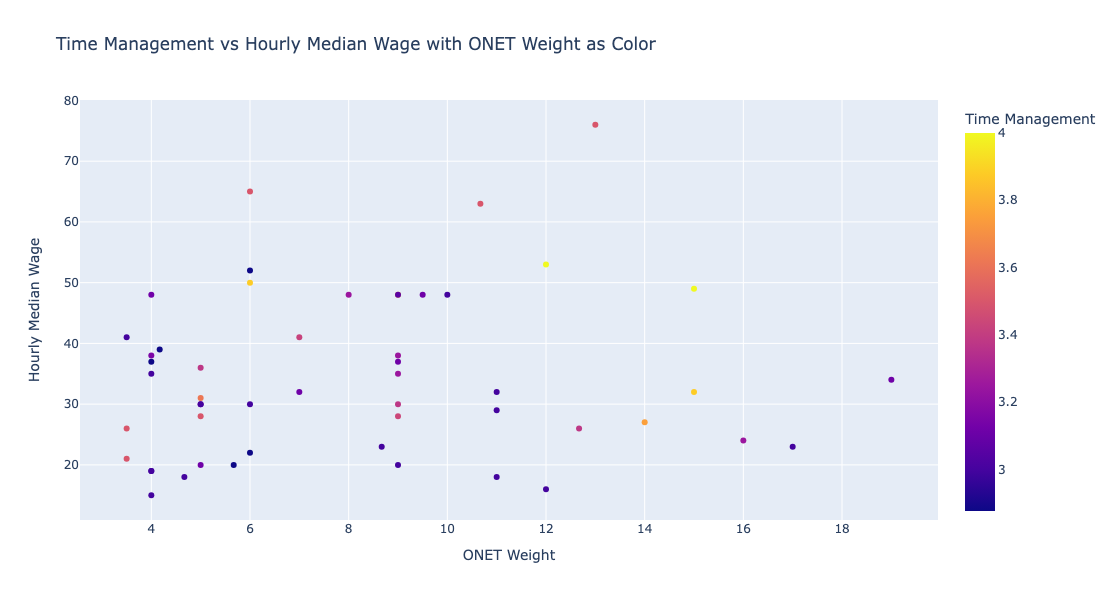

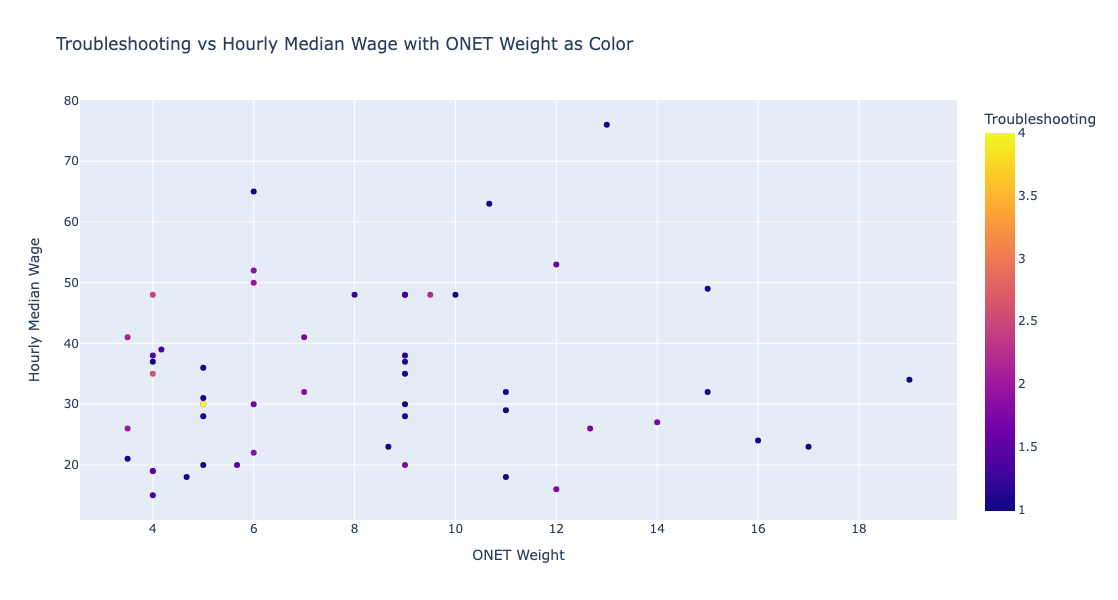

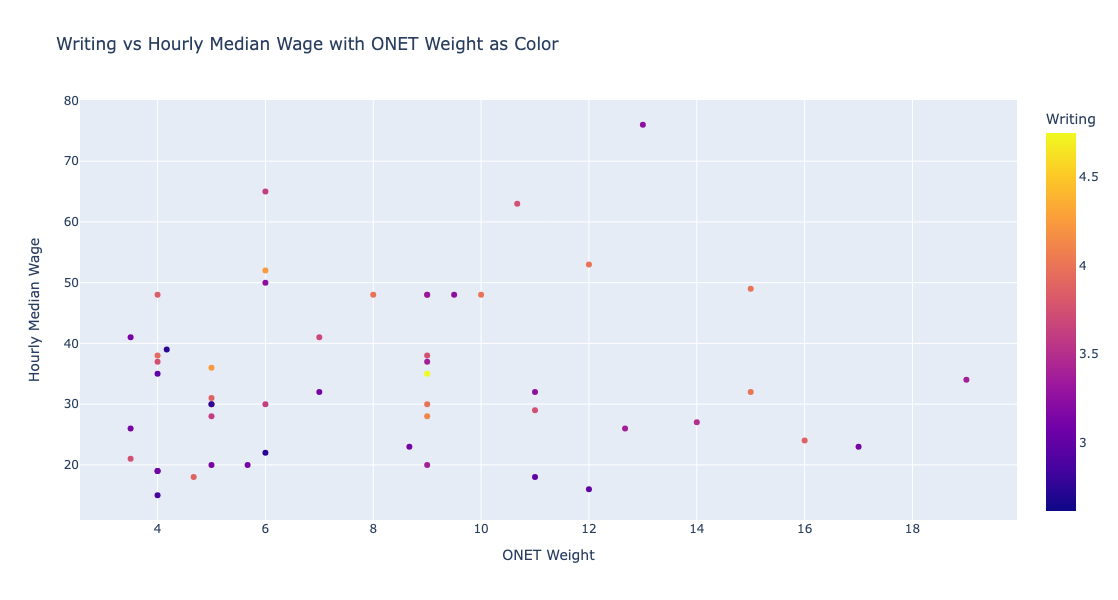

In [83]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import plotly.express as px

types = ['Active Learning', 'Active Listening',
       'Complex Problem Solving', 'Coordination', 'Critical Thinking',
       'Equipment Maintenance', 'Equipment Selection', 'Installation',
       'Instructing', 'Judgment and Decision Making', 'Learning Strategies',
       'Management of Financial Resources', 'Management of Material Resources',
       'Management of Personnel Resources', 'Mathematics', 'Monitoring',
       'Negotiation', 'Operation and Control', 'Operations Analysis',
       'Operations Monitoring', 'Persuasion', 'Programming',
       'Quality Control Analysis', 'Reading Comprehension', 'Repairing',
       'Science', 'Service Orientation', 'Social Perceptiveness', 'Speaking',
       'Systems Analysis', 'Systems Evaluation', 'Technology Design',
       'Time Management', 'Troubleshooting', 'Writing']

# #make the label when you go over it to be the onet_title
# for type in types:
#     plt.figure(figsize=(14, 10))
#     scatter = plt.scatter(x=bls_df['onet_weight'], y=bls_df['H_MEDIAN'], c=bls_df[type], cmap='viridis', alpha=0.7)
#     plt.xlabel('ONET WEIGHT')
#     plt.ylabel('Hourly Median Wage (H_MEDIAN)')
#     plt.title(f'{type} vs Hourly Median Wage with ONET Weight as Color')
#     plt.colorbar(scatter, label=type)
#     plt.show()

for type in types:
    fig = px.scatter(
        bls_df,
        x='onet_weight',
        y='H_MEDIAN',
        color=type,
        labels={
            'onet_weight': 'ONET Weight',
            'H_MEDIAN': 'Hourly Median Wage',
            type: type
        },
        hover_name='onet_title',
        title=f'{type} vs Hourly Median Wage with ONET Weight as Color'
    )
    fig.update_layout(
        coloraxis_colorbar=dict(title=type),
        autosize=False,
        width=800,
        height=600
    )
    fig.show()

In [87]:
sample_df

Index(['organization name', 'full_description', 'industries',
       'headquarters location', 'founded date', 'description', 'CB rank',
       'headquarters region', 'postal code', 'estimated revenue',
       'operating status', 'exit date', 'closed date', 'company type',
       'website', 'twitter', 'facebook', 'linkedin', 'email', 'phone number',
       'number of articles', 'hub tags', 'actively hiring', 'num of sub orgs',
       'investor type', 'investor stage', 'number of founders', 'founders',
       'number of employees', 'total funding amount',
       'number of funding rounds', 'last funding amount', 'last funding type',
       'description_all', 'industries_parsed', 'generated_description_llm',
       'generated_description', 'generated_description_conf_interval',
       'generated_description_conf_interval_reasoning',
       'parsed_description_llm', 'parsed_description', 'Tasks/Jobs',
       'Industry', 'Customers', 'parsed_description_conf_interval',
       'parsed_descri

In [251]:
bls_df

onet_title  onet_weight  \
0    Market Research Analysts and Marketing Special...        54.97   
1                                      Data Scientists        29.19   
2                     Customer Service Representatives        27.92   
3                    Financial and Investment Analysts        24.50   
4                                   Marketing Managers        12.90   
..                                                 ...          ...   
834                                                  0         0.00   
835                                                  0         0.00   
836                                                  0         0.00   
837                                                  0         0.00   
838                                                  0         0.00   

    Detailed Occupation  Active Learning  Active Listening  \
0               13-1161            3.625             3.815   
1               15-2051            3.685             3.880   
2               43-4051            2.880             4.000   
3               13-2051            0.000             0.000   
4               11-2021            3.880             3.880   
..                  ...              ...               ...   
834             53-3099            0.000             0.000   
835             53-4099            0.000             0.000   
836             53-6032            0.000             0.000   
837             53-6099            0.000             0.000   
838             53-7199            0.000             0.000   

     Complex Problem Solving  Coordination  Critical Thinking  \
0                       3.88         3.125              3.875   
1                       3.50         3.190              4.000   
2                       3.12         2.880              3.250   
3                       0.00         0.000              0.000   
4                       3.62         3.500              3.880   
..                       ...           ...                ...   
834                     0.00         0.000              0.000   
835                     0.00         0.000              0.000   
836                     0.00         0.000              0.000   
837                     0.00         0.000              0.000   
838                     0.00         0.000              0.000   

     Equipment Maintenance  Equipment Selection  ...  A_PCT90  ANNUAL  HOURLY  \
0                     1.00                1.000  ...   137040       0       0   
1                     1.06                1.565  ...   184090       0       0   
2                     1.00                1.000  ...    61250       0       0   
3                     0.00                0.000  ...   175840       0       0   
4                     1.00                1.000  ...        0       0       0   
..                     ...                  ...  ...      ...     ...     ...   
834                   0.00                0.000  ...    63410       0       0   
835                   0.00                0.000  ...    85490       0       0   
836                   0.00                0.000  ...    53820       0       0   
837                   0.00                0.000  ...    63680       0       0   
838                   0.00                0.000  ...    63430       0       0   

     Major Group  Minor Group  Broad Group  \
0        13-0000      13-1000      13-1160   
1        15-0000      15-2000      15-2050   
2        43-0000      43-4000      43-4050   
3        13-0000      13-2000      13-2050   
4        11-0000      11-2000      11-2020   
..           ...          ...          ...   
834      53-0000      53-3000      53-3090   
835      53-0000      53-4000      53-4090   
836      53-0000      53-6000      53-6030   
837      53-0000      53-6000      53-6090   
838      53-0000      53-7000      53-7190   

                                                 Title  \
0    Market Research Analysts and Marketing Special...   
1                      

In [233]:
out.skills_df.loc["43-4051"]

Element Name
Active Learning                      2.88
Active Listening                     4.00
Complex Problem Solving              3.12
Coordination                         2.88
Critical Thinking                    3.25
Equipment Maintenance                1.00
Equipment Selection                  1.00
Installation                         1.00
Instructing                          2.75
Judgment and Decision Making         2.88
Learning Strategies                  2.62
Management of Financial Resources    1.38
Management of Material Resources     1.38
Management of Personnel Resources    2.38
Mathematics                          2.25
Monitoring                           3.00
Negotiation                          3.00
Operation and Control                1.00
Operations Analysis                  1.62
Operations Monitoring                1.75
Persuasion                           3.00
Programming                          1.50
Quality Control Analysis             1.12
Reading Comprehension

In [303]:
# df = pd.read_csv("../input/skills/Skills.csv")

# df[df.Title.str.contains("Investment")].Title.unique()
# df[df["O*NET-SOC Code"].str.startswith("13-205")]

O*NET-SOC Code                        Title Element ID  \
5880     13-2052.00  Personal Financial Advisors    2.A.1.a   
5881     13-2052.00  Personal Financial Advisors    2.A.1.a   
5882     13-2052.00  Personal Financial Advisors    2.A.1.b   
5883     13-2052.00  Personal Financial Advisors    2.A.1.b   
5884     13-2052.00  Personal Financial Advisors    2.A.1.c   
...             ...                          ...        ...   
6015     13-2053.00       Insurance Underwriters    2.B.5.b   
6016     13-2053.00       Insurance Underwriters    2.B.5.c   
6017     13-2053.00       Insurance Underwriters    2.B.5.c   
6018     13-2053.00       Insurance Underwriters    2.B.5.d   
6019     13-2053.00       Insurance Underwriters    2.B.5.d   

                           Element Name Scale ID  Scale Name  Data Value    N  \
5880              Reading Comprehension       IM  Importance        4.00  8.0   
5881              Reading Comprehension       LV       Level        4.00  8.0   
5882                   Active Listening       IM  Importance        4.00  8.0   
5883                   Active Listening       LV       Level        4.00  8.0   
5884                            Writing       IM  Importance        4.00  8.0   
...                                 ...      ...         ...         ...  ...   
6015  Management of Financial Resources       LV       Level        1.12  8.0   
6016   Management of Material Resources       IM  Importance        2.00  8.0   
6017   Management of Material Resources       LV       Level        1.00  8.0   
6018  Management of Personnel Resources       IM  Importance        2.38  8.0   
6019  Management of Personnel Resources       LV       Level        2.25  8.0   

      Standard Error  Lower CI Bound  Upper CI Bound Recommend Suppress  \
5880          0.0000          4.0000          4.0000                  N   
5881          0.0000          4.0000          4.0000                  N   
5882          0.0000          4.0000          4.0000                  N   
5883          0.0000          4.0000          4.0000                  N   
5884          0.0000          4.0000          4.0000                  N   
...              ...             ...             ...                ...   
6015          0.1250          0.8800          1.3700                  N   
6016          0.0000          2.0000          2.0000                  N   
6017          0.0000          1.0000          1.0000                  N   
6018          0.1830          2.0164          2.7336                  N   
6019          0.1637          1.9292          2.5708                  N   

     Not Relevant     Date Domain Source  
5880          NaN  08/2020       Analyst  
5881            N  08/2020       Analyst  
5882          NaN  08/2020       Analyst  
5883            N  08/2020       Analyst  
5884          NaN  08/2020       Analyst  
...           ...      ...           ...  
6015            N  08/2018       Analyst  
6016          NaN  08/2018       Analyst  
6017            N  08/2018       Analyst  
6018          NaN  08/2018       Analyst  
6019            N  08/2018       Analyst  

[140 rows x 15 columns]

In [377]:
skills_df = skills_df.rename({"O*NET-SOC Code":"Detailed Occupation"},axis=1)
skills_df.head()

Element Name  Active Learning  Active Listening  Complex Problem Solving  \
0                        3.75              4.00                     4.19   
1                        3.62              4.00                     3.62   
2                        3.25              4.12                     3.50   
3                        3.88              3.88                     3.62   
4                        3.75              4.00                     3.75   

Element Name  Coordination  Critical Thinking  Equipment Maintenance  \
0                     4.00               4.25                    1.0   
1                     3.88               3.88                    1.0   
2                     3.50               4.00                    1.0   
3                     3.50               3.88                    1.0   
4                     3.88               3.88                    1.0   

Element Name  Equipment Selection  Installation  Instructing  \
0                            1.12           1.0        3.315   
1                            1.00           1.0        3.000   
2                            1.12           1.0        2.880   
3                            1.00           1.0        3.000   
4                            1.00           1.0        3.620   

Element Name  Judgment and Decision Making  ...  Service Orientation  \
0                                    4.315  ...                3.185   
1                                    3.620  ...                3.250   
2                                    3.750  ...                3.120   
3                                    3.750  ...                3.120   
4                                    3.750  ...                3.880   

Element Name  Social Perceptiveness  Speaking  Systems Analysis  \
0                              4.00     4.125              4.00   
1                              3.75     4.000              3.12   
2                              4.00     4.000              3.12   
3                              3.88     3.880              3.25   
4                              3.88     4.000              3.62   

Element Name  Systems Evaluation  Technology Design  Time Management  \
0                          4.065              1.815             3.69   
1                          3.120              1.500             3.62   
2                          3.120              1.750             3.50   
3                          3.500              1.750             3.50   
4                          3.620              1.750             3.50   

Element Name  Troubleshooting  Writing  broad_occ  
0                        1.25     4.12     11-101  
1                        1.75     3.50     11-102  
2                        1.00     3.75     11-201  
3                        1.00     3.25     11-202  
4                        1.00     3.62     11-202  

[5 rows x 36 columns]

In [378]:
skills_df = out.skills_df.reset_index()

In [379]:
# total = skills_df.merge(codes,on="Detailed Occupation", how="right")
# cols = codes.columns
# df_broad = total[total["Active Learning"].isnull()]
# df_broad["broad_occ"] = df_broad["Detailed Occupation"].apply(lambda x: x[:6])
# df_broad = df_broad[list(["broad_occ"]+list(cols))]
# skills_df["broad_occ"] = skills_df["Detailed Occupation"].apply(lambda x: x[:6])
# skills_df = skills_df.drop(columns=["Detailed Occupation"])
# df_broad = df_broad.merge(skills_df_broad,on="broad_occ",how="inner")
# total = total[~total["Active Learning"].isnull()]
# skills_df_soc_codes = pd.concat([df_broad,total],axis=0)
# skills_df_soc_codes.to_csv('../input/skills_df_soc_codes.csv')

/var/folders/nf/2dvvlnxj5v962kwwzmpfj17h0000gn/T/ipykernel_54128/2898062444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broad["broad_occ"] = df_broad["Detailed Occupation"].apply(lambda x: x[:6])


In [387]:
skills_df_soc_codes

broad_occ Major Group Minor Group Broad Group Detailed Occupation  \
0      11-301     11-0000     11-3000     11-3010             11-3013   
1      11-903     11-0000     11-9000     11-9030             11-9039   
2      11-907     11-0000     11-9000     11-9070             11-9072   
3      13-108     13-0000     13-1000     13-1080             13-1082   
4      13-202     13-0000     13-2000     13-2020             13-2022   
..        ...         ...         ...         ...                 ...   
842       NaN     53-0000     53-7000     53-7070             53-7071   
843       NaN     53-0000     53-7000     53-7070             53-7072   
844       NaN     53-0000     53-7000     53-7070             53-7073   
845       NaN     53-0000     53-7000     53-7080             53-7081   
846       NaN     53-0000     53-7000     53-7120             53-7121   

                                                 Title  \
0                                  Facilities Managers   
1                  Education Administrators, All Other   
2    Entertainment and Recreation Managers, Except ...   
3                       Project Management Specialists   
4         Appraisers of Personal and Business Property   
..                                                 ...   
842   Gas Compressor and Gas Pumping Station Operators   
843            Pump Operators, Except Wellhead Pumpers   
844                                   Wellhead Pumpers   
845          Refuse and Recyclable Material Collectors   
846                  Tank Car, Truck, and Ship Loaders   

                                   Major Group Name  \
0                            Management Occupations   
1                            Management Occupations   
2                            Management Occupations   
3     Business and Financial Operations Occupations   
4     Business and Financial Operations Occupations   
..                                              ...   
842  Transportation and Material Moving Occupations   
843  Transportation and Material Moving Occupations   
844  Transportation and Material Moving Occupations   
845  Transportation and Material Moving Occupations   
846  Transportation and Material Moving Occupations   

                    Minor Group Name  \
0    Operations Specialties Managers   
1       Other Management Occupations   
2       Other Management Occupations   
3    Business Operations Specialists   
4              Financial Specialists   
..                               ...   
842          Material Moving Workers   
843          Material Moving Workers   
844          Material Moving Workers   
845          Material Moving Workers   
846          Material Moving Workers   

                                    Broad Group Name  Active Learning  ...  \
0    Administrative Services and Facilities Managers         3.120000  ...   
1             Education and Childcare Administrators         3.753333  ...   
2              Entertainment and Recreation Managers         3.500000  ...   
3    Logisticians and Project Management Specialists         3.456667  ...   
4                  Property Appraisers and Assessors         3.370000  ...   
..                                               ...              ...  ...   
842                        Pumping Station Operators         2.880000  ...   
843                        Pumping Station Operators         2.880000  ...   
844                        Pumping Station Operators         2.380000  ...   
845        Refuse and Recyclable Material Collectors         2.250000  ...   
846                Tank Car, Truck, and Ship Loaders         2.750000  ...   

      Science  Service Orientation  Social Perceptiveness  Speaking  \
0    1.000000             3.250000               3.250000  3.880000   
1    1.583333             3.753333               3.960000  4.126667   
2    1.620000             3.750000               3.750000  3.880000   
3    2.000000             3.083333               3.246667  3.793333

In [271]:
codes = pd.read_csv("../input/soc_codes/soc_codes.csv",index_col=0)
codes[codes.Title=="Financial and Investment Analysts"]

Major Group Minor Group Broad Group Detailed Occupation  \
120     13-0000     13-2000     13-2050             13-2051   

                                 Title  \
120  Financial and Investment Analysts   

                                  Major Group Name       Minor Group Name  \
120  Business and Financial Operations Occupations  Financial Specialists   

                    Broad Group Name  
120  Financial Analysts and Advisors

Detailed Occupation Minor Group Broad Group  \
0               11-1031     11-1000     11-1030   
1               11-2032     11-2000     11-2030   
2               11-2033     11-2000     11-2030   
13              19-1099     19-1000     19-1090   
19              21-2099     21-2000     21-2090   
25              25-3031     25-3000     25-3030   
26              25-3099     25-3000     25-3090   
30              25-9099     25-9000     25-9090   
33              27-2091     27-2000     27-2090   
34              27-2099     27-2000     27-2090   
37              27-4099     27-4000     27-4090   
45              29-2042     29-2000     29-2040   
46              29-2043     29-2000     29-2040   
47              29-2072     29-2000     29-2070   
48              29-9021     29-9000     29-9020   
49              33-1091     33-1000     33-1090   
50              33-1099     33-1000     33-1090   
53              35-9099     35-9000     35-9090   
60              39-9099     39-9000     39-9090   
61              41-3091     41-3000     41-3090   
63              43-2099     43-2000     43-2090   
64              43-3099     43-3000     43-3090   
65              43-4199     43-4000     43-4190   
66              43-9199     43-9000     43-9190   
71              47-5099     47-5000     47-5090   
77              51-7099     51-7000     51-7090   
84              53-3099     53-3000     53-3090   
85              53-4099     53-4000     53-4090   
87              53-6099     53-6000     53-6090   
88              53-7199     53-7000     53-7190   
89              55-1011     55-1000     55-1010   
90              55-1012     55-1000     55-1010   
91              55-1013     55-1000     55-1010   
92              55-1014     55-1000     55-1010   
93              55-1015     55-1000     55-1010   
94              55-1016     55-1000     55-1010   
95              55-1017     55-1000     55-1010   
96              55-1019     55-1000     55-1010   
97              55-2011     55-2000     55-2010   
98              55-2012     55-2000     55-2010   
99              55-2013     55-2000     55-2010   
100             55-3011     55-3000     55-3010   
101             55-3012     55-3000     55-3010   
102             55-3013     55-3000     55-3010   
103             55-3014     55-3000     55-3010   
104             55-3015     55-3000     55-3010   
105             55-3016     55-3000     55-3010   
106             55-3018     55-3000     55-3010   
107             55-3019     55-3000     55-3010   

                                                 Title  \
0                                          Legislators   
1                            Public Relations Managers   
2                                 Fundraising Managers   
13                          Life Scientists, All Other   
19                        Religious Workers, All Other   
25                     Substitute Teachers, Short-Term   
26                 Teachers and Instructors, All Other   
30   Educational Instruction and Library Workers, A...   
33                          Disc Jockeys, Except Radio   
34   Entertainers and Performers, Sports and Relate...   
37   Media and Communication Equipment Workers, All...   
45                       Emergency Medical Technicians   
46                                          Paramedics   
47                         Medical Records Specialists   
48   Health Information Technologists and Medical R...   
49          First-Line Supervisors of Security Workers   
50   First-Line Supervisors of Protective Service W...   
53   Food Preparation and Serving Related Workers, ...   
60        Personal Care and Service Workers, All Other   
61   Sales Representatives of Services, Except Adve...   
63       Communications Equipment Operators, All Other   
64                         Financial Clerks, All Other   
65            Information and Record Clerks, All Other   
66   Office and Administrative Support Workers, All...   
71 

In [ ]:
# activities_df = pd.read_csv("../input/onet/embeddings/activity_embeddings.csv")
# activities_df.embedding = activities_df.embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
# activity_embeddings = np.vstack(activities_df.embedding)
# task_embeddings = np.vstack(df.example_task_embedding)
# cosine_sim = cosine_similarity(task_embeddings, activity_embeddings, 'cosine')
# activities = list(activities_df.activity)
# df[activities] = cosine_sim
# skill_activity = pd.read_csv("../input/onet/Skills to Work Activities.csv")[["Work Activities Element Name","Skills Element Name"]]
# skill_activity.columns = ["activity","skill"]
# for group in skill_activity.groupby("skill"):
#     skill = group[0]
#     activities = group[1]["activity"].values
#     df[skill+"_task"] = df[activities].sum(axis=1)/len(activities)
# skills = list(skill_activity.skill.unique()+"_task")

# work_activities = pd.read_csv("../input/onet/Work Activities.csv")
# activities_df = pd.DataFrame(columns=["activity","embedding"])
# for i,activity in enumerate(list(work_activities["Element Name"].unique())):
#     activities_df.loc[i] = [activity,x_chat.get_embedding(activity)]
# activities_df.to_csv("../input/onet/activity_embeddings.csv")


# occ_groups = list(df.groupby("Major Group Name")["organization_name"].count().sort_values(ascending=False).index)

# for value in activities:
#     for occ_group in occ_groups[:4]:
#         graph_df = df[df["Major Group Name"] == occ_group]
#         graph_df.head()
#         # Plot using Plotly with clusters
#         fig = px.scatter(graph_df, x='onet_task_embedding_tsne1', y='onet_task_embedding_tsne2',
#                          color=value,
#                          color_continuous_scale=px.colors.diverging.Tealrose,
#                          hover_data=['onet_task'],
#                          range_color=[0, .3],
#                          labels={value: 'Value'})
#         fig.update_traces(marker_size=10)                  
        
#         fig.update_layout(
#             title=f"{occ_group} {value}", 
#             hovermode='closest',
#             width=1000,  # Set the width of the figure
#             height=600  # Set the height of the figure
#         )
#         fig.show()